In [50]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\conno_leva1li\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill )

display(df.head())

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [51]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [52]:
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month

df_DA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10


In [53]:
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

In [54]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot.drop('Total', inplace=True)

Text(0, 0.5, 'Count')

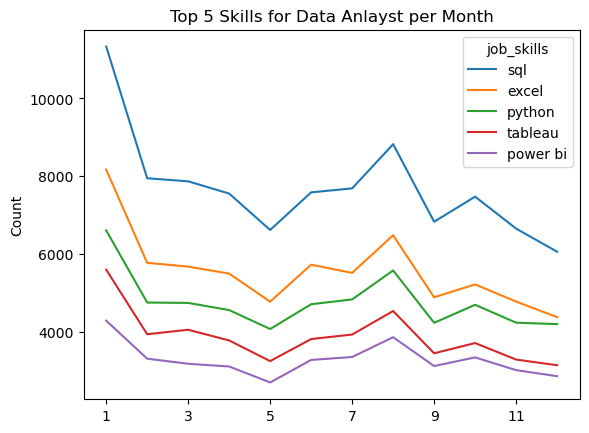

In [55]:
df_DA_pivot.iloc[:, 0:5].plot(kind='line')
plt.title('Top 5 Skills for Data Anlayst per Month')
plt.xlabel('')
plt.ylabel('Count')

In [61]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month_abv'] = df_DA_pivot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot

job_skills,job_posted_month_abv,job_posted_month,sql,excel,python,tableau,power bi,r,sas,powerpoint,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
0,Jan,1,11336,8170,6606,5596,4285,3607,3830,1880,...,2,0,0,1,0,0,0,1,0,0
1,Feb,2,7947,5772,4751,3936,3307,2576,2634,1291,...,0,0,0,0,0,0,0,0,0,0
2,Mar,3,7868,5675,4741,4051,3176,2650,2554,1266,...,0,1,0,0,0,0,1,0,0,0
3,Apr,4,7553,5496,4557,3776,3106,2399,2598,1190,...,0,0,0,0,1,0,0,0,0,0
4,May,5,6617,4773,4070,3245,2695,2093,1940,979,...,0,0,0,0,0,0,0,0,0,1
5,Jun,6,7584,5724,4707,3812,3275,2442,2174,1173,...,0,0,0,0,0,0,0,0,0,0
6,Jul,7,7687,5513,4831,3928,3350,2444,2118,1096,...,0,0,1,0,0,0,0,0,0,0
7,Aug,8,8823,6482,5576,4533,3859,2975,2560,1332,...,0,0,0,0,0,0,0,0,0,0
8,Sep,9,6829,4886,4229,3446,3118,2146,1880,944,...,0,0,0,0,0,0,0,0,0,0
9,Oct,10,7474,5217,4693,3709,3340,2380,2114,955,...,0,1,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Count')

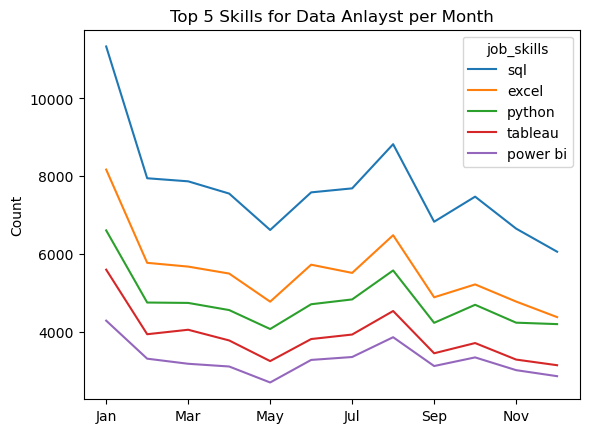

In [62]:

df_DA_pivot = df_DA_pivot.set_index('job_posted_month_abv')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month')

df_DA_pivot.iloc[:, 0:5].plot(kind='line')
plt.title('Top 5 Skills for Data Anlayst per Month')
plt.xlabel('')
plt.ylabel('Count')